In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#file_loc= "U:/Edm/PC and ORM/ORM/Consequence/Volume Out Calculation/Current Volume Out Profiles/Graphs"
HCAs_all=pd.read_csv(f"{'2019 HCAs_US & CAD'}.csv")
Valves_all=pd.read_excel(f"{'Valves_All'}.xls")
Facilities_all=pd.read_excel(f"{'Facilities_All'}.xls")
water_Xing_all= pd.read_excel(f"{'Water Crossings'}.xlsx")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [ ]:
def draw_graph(Baseline,line_ID, pic_num, RC_valves,HO_valves, facility_name1,facility_name2,x_limit1,x_limit2, maj_water_Xing,min_water_Xing,CNW,ESA,DW,OPA,HPA):
  fig, ax = plt.subplots()
  
  y_top = Baseline["Maximum Total LVR (bbl)"].max()+2000

  for index, row in maj_water_Xing.iterrows():
    vertical_alignment= 0.5*y_top if (index % 2 == 0) else 0.5*y_top+1000
    ax.axvline(x=row["ROW MP"],color = "xkcd:lightish blue", linewidth = .6, alpha=.6 , label = "Water Crossing>=100 ft")
    ax.annotate(int(round(row['Width (ft)'])), xy=(row["ROW MP"], vertical_alignment),size = 5, color = "xkcd:lightish blue")

  for j in min_water_Xing['ROW MP']:
    ax.axvline(x=j,color = "orange", linewidth = .5 , label = "Water Crossing <100 ft")
   
  ax.plot(Baseline["ROW MP"],Baseline["Maximum Total LVR (bbl)"],color = "red", label = "Baseline", linewidth = 0.6, alpha = 1,zorder = 2)
  ax.set_xlabel("ROW MP", fontsize="x-small")

  ax.set_ylabel("Potential Volume Release (bbl)",fontsize="x-small")
  
  

  ax.tick_params(axis='x', which='major', pad=-5,labelrotation=45, labelsize = 7)
  ax.tick_params(axis="y", labelsize = 7)
  ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
  plt.ylim(bottom = 0,top=y_top)
           
  plt.xlim(left = x_limit1,right=x_limit2)
  
  plt.scatter(x=x_limit1, y = 0, marker ="s", color = "black", label = "Facilities", zorder = 3, clip_on=False, s= 10)
  plt.scatter(x=x_limit2, y = 0, marker ="s", color = "black", label = "Facilities", zorder = 3, clip_on=False, s = 10)
  ax.grid(axis="both",which="major", ls="--", c="#eeeeee", linewidth=0.5, alpha = 0.8,zorder = -1)

  for index, row in RC_valves.iterrows():
    ax.scatter(x=row["ROW MP"], y = 0 , marker ="o", color = "xkcd:darkish green", label = "Existing RC Valves",zorder = 2,clip_on=False, s= 10)
   
  for index, row in HO_valves.iterrows():
    ax.scatter(x=row["ROW MP"], y = 0 , marker ="x", color = "purple", label = "HO Valves",zorder = 2,clip_on=False, s= 10, lw = 0.6)

  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  #plt.legend(by_label.values(), by_label.keys())
  
  ax2 = ax.twinx()
  ax2.plot(Baseline["ROW MP"],Baseline["Elevation (ft)"],color = "green", label = "Elevation" , linewidth = .5, alpha=.7)
  ax2.set_ylabel("Elevation (ft)",fontsize="x-small")
  plt.ylim(bottom=0, top =Baseline["Elevation (ft)"].max()+300)
  ax2.tick_params(axis="y", labelsize = 7)

  graph_title = facility_name1+" to " + facility_name2
  plt.title(graph_title)
  
  CNW_height = Baseline["Elevation (ft)"].max()+50
  ESA_height = Baseline["Elevation (ft)"].max()+100
  DW_height = Baseline["Elevation (ft)"].max()+150
  OPA_height = Baseline["Elevation (ft)"].max()+200
  HPA_height = Baseline["Elevation (ft)"].max()+250

  for index, row in CNW.iterrows():
    ax2.plot([row["StartMP"], row["EndMP"]], [CNW_height,CNW_height],color = "xkcd:darkish blue", linewidth = 3, label = "CNW")
  for index, row in ESA.iterrows():
    ax2.plot([row["StartMP"], row["EndMP"]], [ESA_height,ESA_height],color = "green", linewidth = 3, label = "ESA")
  for index, row in DW.iterrows():
    ax2.plot([row["StartMP"], row["EndMP"]], [DW_height,DW_height],color = "xkcd:lightish blue", linewidth = 3, label = "DW")
  for index, row in OPA.iterrows():
    ax2.plot([row["StartMP"], row["EndMP"]], [OPA_height,OPA_height],color = "red", linewidth = 3, label = "OPA")
  for index, row in HPA.iterrows():
    ax2.plot([row["StartMP"], row["EndMP"]], [HPA_height,HPA_height],color = "xkcd:darkish red", linewidth = 3, label = "HPA")

  handles2, labels2 = plt.gca().get_legend_handles_labels()
  handles = handles + handles2
  labels = labels + labels2
  by_label = dict(zip(labels, handles))
  fig.legend(by_label.values(), by_label.keys(), loc='center left', ncol=1,bbox_to_anchor =(1, 0.5,0.5,0.5),fontsize="x-small",frameon=False)
  plt.tight_layout()  
  
  fig.savefig(f"Line_ID {line_ID}/{pic_num} - {line_ID} - {graph_title}.jpeg",format='jpeg', dpi=500, bbox_inches='tight')
  
  plt.show()
  
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

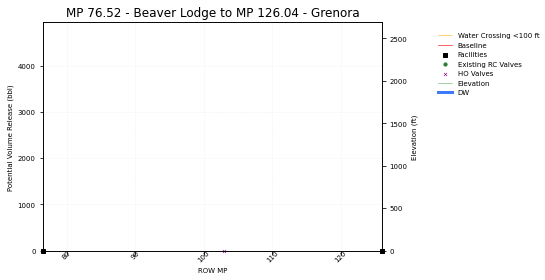

In [ ]:

Baseline = pd.read_excel("L0083 - 2020-09-02.xlsx")


line_ID_all=Baseline.Line_ID.unique()

for line_ID in line_ID_all:
        
    valves=Valves_all[Valves_all.loc[:,'Equation Location']==line_ID]
    Facilities=Facilities_all[Facilities_all.loc[:,'Equation Location']==line_ID]
    HCAs=HCAs_all[HCAs_all.loc[:,'Line_ID']==line_ID]
    water_Xing=water_Xing_all[water_Xing_all.Line_ID==line_ID]  
    Baseline.fillna(0, inplace=True)

    CNW=HCAs[HCAs.HCA_Type=="CNW"]
    ESA=HCAs[HCAs.HCA_Type=="ESA"]
    DW=HCAs[HCAs.HCA_Type=="DW"]
    OPA=HCAs[HCAs.HCA_Type=="OPA"]
    HPA=HCAs[HCAs.HCA_Type=="HPA"]


    water_Xing["ROW MP"]= water_Xing["MidMP"]
    water_Xing["Width (ft)"] = water_Xing["Water_Crossing_Width_ft__min"].astype(float)
    maj_water_Xing = water_Xing[water_Xing.loc[:,"Width (ft)"]>= 100].sort_values(by="ROW MP").reset_index(drop=True)
    min_water_Xing = water_Xing[(water_Xing["Width (ft)"]< 100)|(water_Xing["Width (ft)"].isnull())].sort_values(by="ROW MP").reset_index(drop=True)

    valves["ROW MP"]=valves["MP"]
    RC_valves = valves[valves["Isolation"]=="Yes"]
    HO_valves = valves[valves["Isolation"]=="No"]

    Facilities= Facilities.merge(valves.loc[:,("Relative Location","ROW MP")],on="Relative Location")

    #dir = os.path.join("U:/Edm/PC and ORM/ORM/Consequence/Volume Out Calculation/Current Volume Out Profiles/Graphs",f"Line_ID {str(line_ID)}")
    #if not os.path.exists(dir):
       # os.mkdir(dir)
    for i in range(len(Facilities)-1):
      x_limit1,x_limit2 = Facilities.loc[i,"ROW MP"], Facilities.loc[i+1,"ROW MP"]
      facility_name1,facility_name2 = Facilities.loc[i,"Facility Name"], Facilities.loc[i+1,"Facility Name"]
      Baseline_filtered = Baseline[(Baseline["ROW MP"]>=x_limit1) & (Baseline["ROW MP"]<=x_limit2)]
      maj_water_Xing_filtered=maj_water_Xing[(maj_water_Xing["ROW MP"]>=x_limit1) & (maj_water_Xing["ROW MP"]<=x_limit2)]
      min_water_Xing_filtered=min_water_Xing[(min_water_Xing["ROW MP"]>=x_limit1) & (min_water_Xing["ROW MP"]<=x_limit2)]
      RC_valves_filtered = RC_valves[(RC_valves["ROW MP"]>=x_limit1) & (RC_valves["ROW MP"]<=x_limit2)]
      HO_valves_filtered = HO_valves[(HO_valves["ROW MP"]>=x_limit1) & (HO_valves["ROW MP"]<=x_limit2)]
        
      fig, ax = plt.subplots()
        
      y_top = Baseline["Maximum Total LVR (bbl)"].max()+2000

      for index, row in maj_water_Xing.iterrows():
        vertical_alignment= 0.5*y_top if (index % 2 == 0) else 0.5*y_top+1000
        ax.axvline(x=row["ROW MP"],color = "xkcd:lightish blue", linewidth = .6, alpha=.6 , label = "Water Crossing>=100 ft")
        ax.annotate(int(round(row['Width (ft)'])), xy=(row["ROW MP"], vertical_alignment),size = 5, color = "xkcd:lightish blue")

      for j in min_water_Xing['ROW MP']:
        ax.axvline(x=j,color = "orange", linewidth = .5 , label = "Water Crossing <100 ft")
      
      ax.plot(Baseline["ROW MP"],Baseline["Maximum Total LVR (bbl)"],color = "red", label = "Baseline", linewidth = 0.6, alpha = 1,zorder = 2)
      ax.set_xlabel("ROW MP", fontsize="x-small")

      ax.set_ylabel("Potential Volume Release (bbl)",fontsize="x-small")
      
      

      ax.tick_params(axis='x', which='major', pad=-5,labelrotation=45, labelsize = 7)
      ax.tick_params(axis="y", labelsize = 7)
      ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
      plt.ylim(bottom = 0,top=y_top)
              
      plt.xlim(left = x_limit1,right=x_limit2)
      
      plt.scatter(x=x_limit1, y = 0, marker ="s", color = "black", label = "Facilities", zorder = 3, clip_on=False, s= 10)
      plt.scatter(x=x_limit2, y = 0, marker ="s", color = "black", label = "Facilities", zorder = 3, clip_on=False, s = 10)
      ax.grid(axis="both",which="major", ls="--", c="#eeeeee", linewidth=0.5, alpha = 0.8,zorder = -1)

      for index, row in RC_valves.iterrows():
        ax.scatter(x=row["ROW MP"], y = 0 , marker ="o", color = "xkcd:darkish green", label = "Existing RC Valves",zorder = 2,clip_on=False, s= 10)
      
      for index, row in HO_valves.iterrows():
        ax.scatter(x=row["ROW MP"], y = 0 , marker ="x", color = "purple", label = "HO Valves",zorder = 2,clip_on=False, s= 10, lw = 0.6)

      handles, labels = plt.gca().get_legend_handles_labels()
      by_label = dict(zip(labels, handles))
      #plt.legend(by_label.values(), by_label.keys())
      
      ax2 = ax.twinx()
      ax2.plot(Baseline["ROW MP"],Baseline["Elevation (ft)"],color = "green", label = "Elevation" , linewidth = .5, alpha=.7)
      ax2.set_ylabel("Elevation (ft)",fontsize="x-small")
      plt.ylim(bottom=0, top =Baseline["Elevation (ft)"].max()+300)
      ax2.tick_params(axis="y", labelsize = 7)

      graph_title = facility_name1+" to " + facility_name2
      plt.title(graph_title)
      
      CNW_height = Baseline["Elevation (ft)"].max()+50
      ESA_height = Baseline["Elevation (ft)"].max()+100
      DW_height = Baseline["Elevation (ft)"].max()+150
      OPA_height = Baseline["Elevation (ft)"].max()+200
      HPA_height = Baseline["Elevation (ft)"].max()+250

      for index, row in CNW.iterrows():
        ax2.plot([row["StartMP"], row["EndMP"]], [CNW_height,CNW_height],color = "xkcd:darkish blue", linewidth = 3, label = "CNW")
      for index, row in ESA.iterrows():
        ax2.plot([row["StartMP"], row["EndMP"]], [ESA_height,ESA_height],color = "green", linewidth = 3, label = "ESA")
      for index, row in DW.iterrows():
        ax2.plot([row["StartMP"], row["EndMP"]], [DW_height,DW_height],color = "xkcd:lightish blue", linewidth = 3, label = "DW")
      for index, row in OPA.iterrows():
        ax2.plot([row["StartMP"], row["EndMP"]], [OPA_height,OPA_height],color = "red", linewidth = 3, label = "OPA")
      for index, row in HPA.iterrows():
        ax2.plot([row["StartMP"], row["EndMP"]], [HPA_height,HPA_height],color = "xkcd:darkish red", linewidth = 3, label = "HPA")

      handles2, labels2 = plt.gca().get_legend_handles_labels()
      handles = handles + handles2
      labels = labels + labels2
      by_label = dict(zip(labels, handles))
      fig.legend(by_label.values(), by_label.keys(), loc='center left', ncol=1,bbox_to_anchor =(1, 0.5,0.5,0.5),fontsize="x-small",frameon=False)
      plt.tight_layout()  
      
      fig.savefig(f"{i} - {line_ID} - {graph_title}.jpeg",format='jpeg', dpi=500, bbox_inches='tight')
      
      plt.show()